In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

In [19]:
df = pd.read_csv('./measures_v2.csv')

cutting_range = 10000
df = df[:cutting_range]
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,130.671143,18.541697,50.958832,-6.354224,44.406025,4999.951660,-96.444450,0.783008,56.287033,33.804623,24.695387,-0.513721,17
9996,130.850998,18.565596,50.969959,-6.411915,44.405380,4999.949219,-96.167320,0.850240,56.304047,33.819828,24.742908,-0.445958,17
9997,131.041473,18.598049,50.940449,-6.440684,44.406151,4999.947266,-96.048012,0.913862,56.291641,33.822655,24.781477,-0.438146,17
9998,131.196259,18.624708,50.915104,-6.421911,44.406166,4999.947754,-96.114769,0.958717,56.282963,33.846939,24.813671,-0.441411,17


In [20]:
output = df[['pm']]
output

,pm
0,24.554214
1,24.538078
2,24.544693
3,24.554018
4,24.565397
...,...
9995,56.287033
9996,56.304047
9997,56.291641
9998,56.282963


In [21]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_q             10000 non-null  float64
 1   coolant         10000 non-null  float64
 2   stator_winding  10000 non-null  float64
 3   u_d             10000 non-null  float64
 4   stator_tooth    10000 non-null  float64
 5   motor_speed     10000 non-null  float64
 6   i_d             10000 non-null  float64
 7   i_q             10000 non-null  float64
 8   pm              10000 non-null  float64
 9   stator_yoke     10000 non-null  float64
 10  ambient         10000 non-null  float64
 11  torque          10000 non-null  float64
 12  profile_id      10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


### ข้อมูลดิบ

In [23]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,93.661862,18.998927,67.365131,-82.634339,54.390042,4983.820988,-132.106663,45.590977,62.679810,39.600745,23.615543,41.285932,17.0
std,16.004368,0.473184,9.245436,31.815526,6.947033,273.178703,16.820752,18.615633,9.323044,4.348884,1.273007,17.378689,0.0
min,-0.974433,17.516184,19.049341,-97.081703,18.276365,-0.004142,-143.617004,-0.000785,24.264736,18.300852,19.850620,-0.907995,17.0
25%,87.091105,18.616066,67.664835,-96.519472,53.381732,4999.947754,-138.736839,53.194949,60.060108,39.276751,23.191890,48.424083,17.0
50%,87.363625,19.063261,72.111660,-96.185665,57.554163,4999.950684,-138.396461,53.368492,66.630432,41.459063,23.863491,48.523693,17.0
75%,88.775841,19.378213,72.121735,-94.672178,58.338955,4999.954102,-138.096840,53.425449,68.747538,42.117552,24.619965,48.599916,17.0
max,131.310089,19.986029,72.430313,0.851181,58.746349,4999.971191,0.004419,55.308327,69.588531,42.770332,25.875355,48.865757,17.0


### Clean Data

In [24]:
df.dropna(inplace=True)
df = df.drop("profile_id", axis=1)
print(f'Has Null : {df.isnull().values.any()}')
# Count the number of NaNs each column has.
nans = pd.isnull(df).sum()
nans[nans > 0]

Has Null : False


Series([], dtype: int64)

### ข้อมูลหลังแก้ไข้

In [25]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,93.661862,18.998927,67.365131,-82.634339,54.390042,4983.820988,-132.106663,45.590977,62.679810,39.600745,23.615543,41.285932
std,16.004368,0.473184,9.245436,31.815526,6.947033,273.178703,16.820752,18.615633,9.323044,4.348884,1.273007,17.378689
min,-0.974433,17.516184,19.049341,-97.081703,18.276365,-0.004142,-143.617004,-0.000785,24.264736,18.300852,19.850620,-0.907995
25%,87.091105,18.616066,67.664835,-96.519472,53.381732,4999.947754,-138.736839,53.194949,60.060108,39.276751,23.191890,48.424083
50%,87.363625,19.063261,72.111660,-96.185665,57.554163,4999.950684,-138.396461,53.368492,66.630432,41.459063,23.863491,48.523693
75%,88.775841,19.378213,72.121735,-94.672178,58.338955,4999.954102,-138.096840,53.425449,68.747538,42.117552,24.619965,48.599916
max,131.310089,19.986029,72.430313,0.851181,58.746349,4999.971191,0.004419,55.308327,69.588531,42.770332,25.875355,48.865757


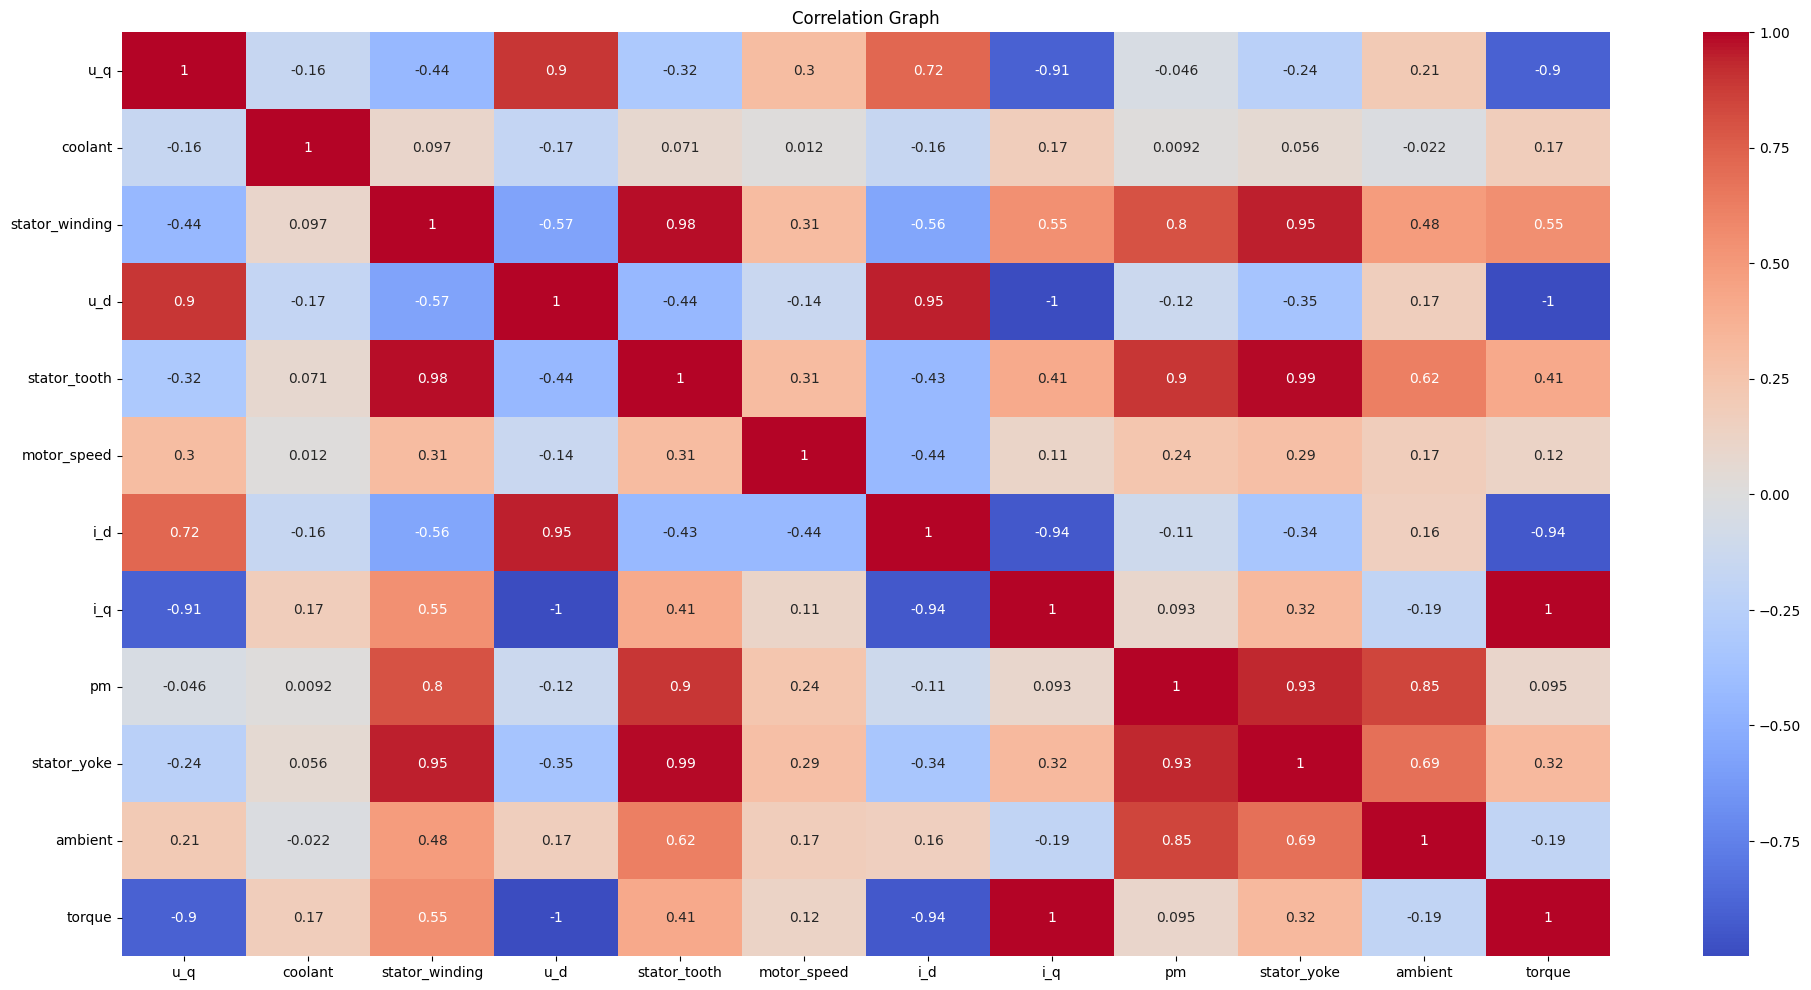

In [26]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Graph')
plt.show()

In [27]:
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,130.671143,18.541697,50.958832,-6.354224,44.406025,4999.951660,-96.444450,0.783008,56.287033,33.804623,24.695387,-0.513721
9996,130.850998,18.565596,50.969959,-6.411915,44.405380,4999.949219,-96.167320,0.850240,56.304047,33.819828,24.742908,-0.445958
9997,131.041473,18.598049,50.940449,-6.440684,44.406151,4999.947266,-96.048012,0.913862,56.291641,33.822655,24.781477,-0.438146
9998,131.196259,18.624708,50.915104,-6.421911,44.406166,4999.947754,-96.114769,0.958717,56.282963,33.846939,24.813671,-0.441411


In [28]:
df_feature = df.drop('pm', axis=1)
df_target = df['pm']

df_target, df_feature

(0       24.554214
 1       24.538078
 2       24.544693
 3       24.554018
 4       24.565397
           ...    
 9995    56.287033
 9996    56.304047
 9997    56.291641
 9998    56.282963
 9999    56.271622
 Name: pm, Length: 10000, dtype: float64,
              u_q    coolant  stator_winding       u_d  stator_tooth  \
 0      -0.450682  18.805172       19.086670 -0.350055     18.293219   
 1      -0.325737  18.818571       19.092390 -0.305803     18.294807   
 2      -0.440864  18.828770       19.089380 -0.372503     18.294094   
 3      -0.327026  18.835567       19.083031 -0.316199     18.292542   
 4      -0.471150  18.857033       19.082525 -0.332272     18.291428   
 ...          ...        ...             ...       ...           ...   
 9995  130.671143  18.541697       50.958832 -6.354224     44.406025   
 9996  130.850998  18.565596       50.969959 -6.411915     44.405380   
 9997  131.041473  18.598049       50.940449 -6.440684     44.406151   
 9998  131.196259  18.624708 

### Standardized Feature

In [29]:
df_feature_standard = StandardScaler().fit_transform(df_feature)
df_feature_standard = pd.DataFrame(df_feature_standard, columns=df_feature.columns)
df_feature_standard

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,-5.880723,-0.409492,-5.222131,2.586423,-5.196266,-18.244714,7.854446,-2.449174,-4.894419,-2.957595,-2.365016
1,-5.872915,-0.381173,-5.221512,2.587814,-5.196037,-18.244724,7.854219,-2.449234,-4.894786,-2.957610,-2.361661
2,-5.880109,-0.359619,-5.221838,2.585717,-5.196140,-18.244716,7.854260,-2.449171,-4.892175,-2.957622,-2.365620
3,-5.872996,-0.345252,-5.222524,2.587487,-5.196363,-18.244702,7.854185,-2.449082,-4.891134,-2.957630,-2.362070
4,-5.882002,-0.299887,-5.222579,2.586982,-5.196524,-18.244713,7.850359,-2.447194,-4.892093,-2.957636,-2.363803
...,...,...,...,...,...,...,...,...,...,...,...
9995,2.312564,-0.966333,-1.774618,2.397695,-1.437235,0.059051,2.120238,-2.407128,-1.332851,0.848305,-2.405345
9996,2.323803,-0.915823,-1.773415,2.395882,-1.437328,0.059042,2.136714,-2.403516,-1.329354,0.885637,-2.401446
9997,2.335705,-0.847235,-1.776607,2.394977,-1.437217,0.059035,2.143808,-2.400098,-1.328704,0.915935,-2.400996
9998,2.345377,-0.790892,-1.779348,2.395567,-1.437214,0.059037,2.139839,-2.397689,-1.323120,0.941226,-2.401184


In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3, random_state=42)

### XGBoost

In [31]:
model_xgboost = xgb.XGBRegressor()

param_xgb = {
    'objective': ['reg:squarederror'],
    'subsample': np.linspace(0.001, 1, dtype=float),
    'learning_rate': np.linspace(0.001, 0.5, dtype=float),
    'max_depth': np.linspace(1, 20, dtype=int),
    'n_estimators': np.linspace(1, 100, dtype=int),
    'colsample_bytree': np.linspace(0.1, 1, dtype=float),
}

In [32]:
# Random Search
xgb_random = RandomizedSearchCV(
    model_xgboost, param_distributions=param_xgb, n_iter=30, scoring='neg_mean_squared_error', cv=5)

xgb_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])},
                   scoring='neg_mean_squared_error')

In [33]:
best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
r2_xgb = best_xgb.score(x_test, y_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost Best Params : {xgb_random.best_params_}')
print(f'XGBoost MSE : {mse_xgb}')
print(f'XGBoost R2 : {r2_xgb}')

XGBoost Best Params : {'subsample': 0.7961224489795918, 'objective': 'reg:squarederror', 'n_estimators': 61, 'max_depth': 17, 'learning_rate': 0.17412244897959184, 'colsample_bytree': 1.0}
XGBoost MSE : 0.02354264349806544
XGBoost R2 : 0.9997513643420661


<Figure size 3200x3200 with 0 Axes>

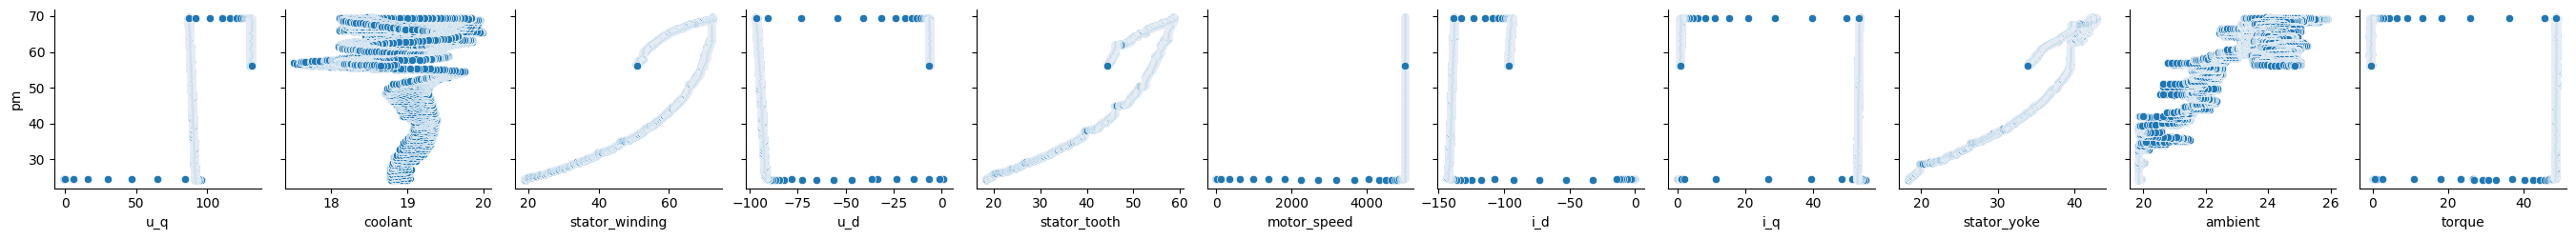

In [42]:
plt.figure(figsize=(32, 32))
sns.pairplot(df, x_vars=df.columns.drop('pm'), y_vars='pm', kind='scatter')
plt.show()



### AdaBoost

In [35]:
model_adaboost = AdaBoostRegressor()
param_adaboost = {
    'n_estimators': np.linspace(1, 100, dtype=int),
    'learning_rate': np.linspace(0.001, 0.5, dtype=float),
    'loss': ['linear', 'square', 'exponential'],
}

In [36]:
ada_random = RandomizedSearchCV(
    model_adaboost, param_distributions=param_adaboost, n_iter=30, scoring='neg_mean_squared_error', cv=5)
ada_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=30,
                   param_distributions={'learning_rate': array([0.001     , 0.01118367, 0.02136735, 0.03155102, 0.04173469,
       0.05191837, 0.06210204, 0.07228571, 0.08246939, 0.09265306,
       0.10283673, 0.11302041, 0.12320408, 0.13338776, 0.14357143,
       0.1537551 , 0.16393878, 0.17412245, 0.18430612, 0.1944898 ,
       0.20467347, 0.21485714, 0.22504...
       0.40834694, 0.41853061, 0.42871429, 0.43889796, 0.44908163,
       0.45926531, 0.46944898, 0.47963265, 0.48981633, 0.5       ]),
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97, 100])},
                   scoring='neg_mean_squared_error')

In [37]:
best_ada = ada_random.best_estimator_
y_pred_ada = best_ada.predict(x_test)
r2_ada = best_ada.score(x_test, y_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)

print(f'AdaBoost Best Params : {ada_random.best_params_}')
print(f'AdaBoost MSE : {mean_squared_error(y_test, y_pred_ada)}')
print(f'AdaBoost R2 : {r2_ada}')

AdaBoost Best Params : {'n_estimators': 81, 'loss': 'linear', 'learning_rate': 0.3166938775510204}
AdaBoost MSE : 1.2293655934070162
AdaBoost R2 : 0.9870165759769898


<Figure size 3200x3200 with 0 Axes>

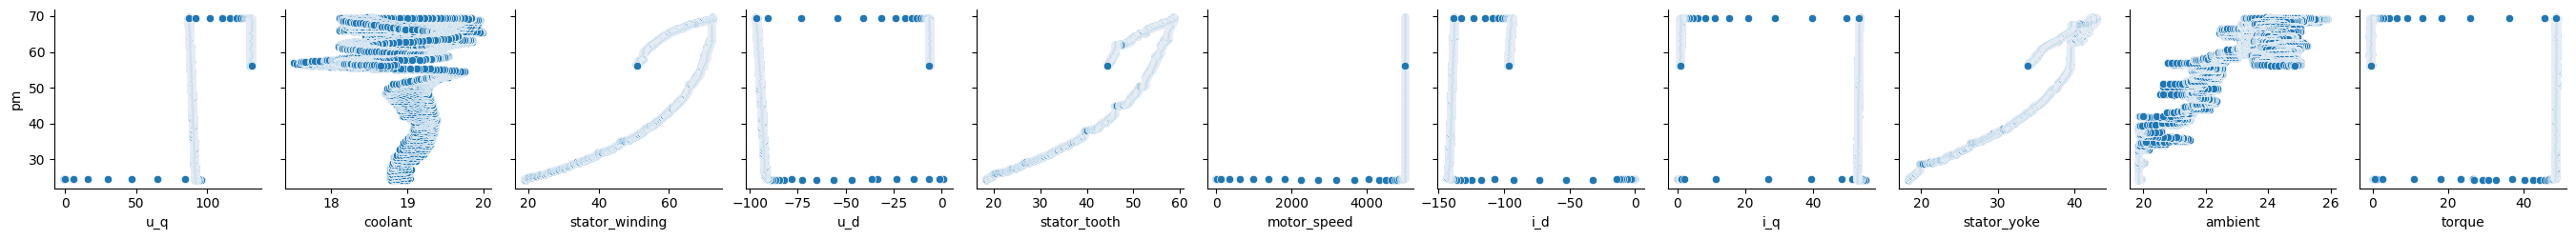

In [43]:
plt.figure(figsize=(32, 32))
sns.pairplot(df, x_vars=df.columns.drop('pm'), y_vars='pm', kind='scatter')
plt.show()
